![Memories Teach](https://lh3.google.com/u/2/d/11o4JyBYhHcmz-LSt63GpOs4lfW9j39T_=w1912-h954-iv1)


`Basic to Advance in Google colab's for image processing, pattern recognition and computer vision`

[Phonepaserth SISAYKEO]

Reference: visioncolab

# Filtering in Image Processing using Masks

# Libraries


In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# 1) Basic Examples

--2023-09-05 14:27:39--  https://www.dropbox.com/s/riy5tlccwc44fo7/rice64.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/riy5tlccwc44fo7/rice64.png [following]
--2023-09-05 14:27:39--  https://www.dropbox.com/s/raw/riy5tlccwc44fo7/rice64.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc559ad4b886d4b686fae0d88e87.dl.dropboxusercontent.com/cd/0/inline/CDKhAts4tertREc3H3lSU3jtYRrEx2DWoBm10PzkaI5084DPjsDA1De7BFDqHEX2olrMQ5XrJ8E1m_2lumzWSyDqtiNXt-c8Y5jEV7tRXQtSddFRjL5-d1cIQqD9_ow1eU8/file# [following]
--2023-09-05 14:27:40--  https://uc559ad4b886d4b686fae0d88e87.dl.dropboxusercontent.com/cd/0/inline/CDKhAts4tertREc3H3lSU3jtYRrEx2DWoBm10PzkaI5084DPjsDA1De7BFDqHEX2olrMQ5XrJ8E1m_2lumzWSyDqtiNXt-c8Y5jEV7tRXQtSddFRjL5-d1cIQqD9_ow1e

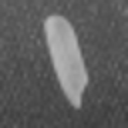

In [ ]:
!wget https://www.dropbox.com/s/riy5tlccwc44fo7/rice64.png
I = cv.imread('rice64.png',0)
cv2_imshow(I)

## 1.1) Average Mask (Low Pass Filter)

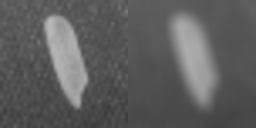

In [ ]:
n   = 15
Mk  = np.ones((n,n),np.float32)/n/n
L   = cv.filter2D(I,-1,Mk)
Z = np.concatenate((I,L),axis=1)
cv2_imshow(Z)

## 1.2) Gaussian Mask (Low Pass Filter)

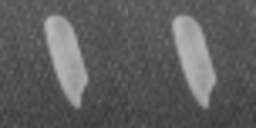

In [ ]:
width  = 5
s      = width/8.5
kernel = cv.getGaussianKernel(width, s)         # Gaussian width x 1  (width = size, s = sigma)
window = np.outer(kernel, kernel.transpose())   # Gaussian width x width
L      = cv.filter2D(I,-1,window)
Z      = np.concatenate((I,L),axis=1)
cv2_imshow(Z)

## 1.2) Horizontal Edges

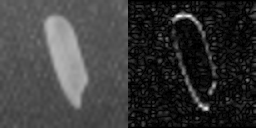

In [ ]:
Id = I.astype(float)

# 3x3 Y-direction  kernel
My = np.array([[ 0, -1,  0], [0, 0, 0], [0, 1, 0]])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
Gy0 = cv.filter2D(Id, -1, My)

# Solo para visualización
Gy = np.abs(Gy0)
Gy = Gy/np.max(Gy)*255


Z = np.concatenate((Id,Gy),axis=1)
cv2_imshow(Z)


## 1.3) Vertical Edges

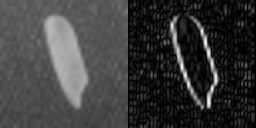

In [ ]:
Id = I.astype(float)

# 3 X 3 X-direction kernel
Mx = np.array([[ 0, 0, 0], [-1, 0, 1], [ 0, 0, 0]])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
Gx0 = cv.filter2D(Id, -1, Mx)

Gx = np.abs(Gx0)
Gx = Gx/np.max(Gx)*255

Z = np.concatenate((Id,Gx),axis=1)
cv2_imshow(Z)


## 1.4) Both edges (horizontal & vertical)

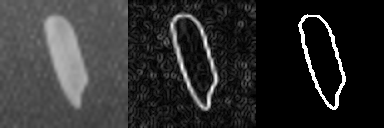

In [ ]:
G = np.sqrt(np.multiply(Gx0,Gx0) + np.multiply(Gy0,Gy0))
G = G/np.max(G)*255
E = (G>125)*255

Z = np.concatenate((Id,G,E),axis=1)
cv2_imshow(Z)

## 1.5) Sobel operator edge detection)

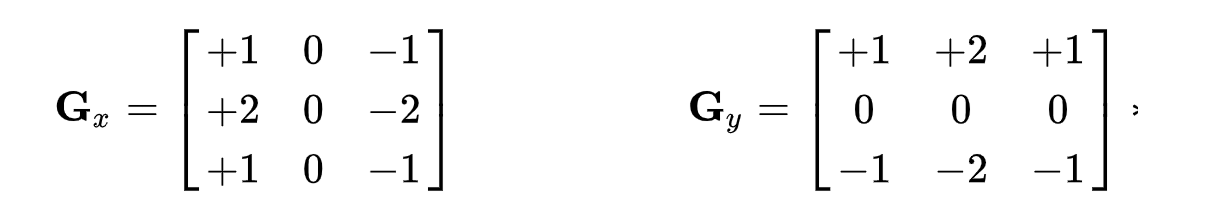

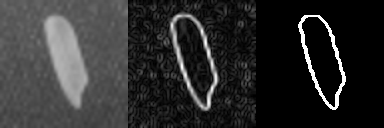

In [ ]:
Gx0 = cv.Sobel(Id,cv.CV_64F,1,0,ksize=3)
Gy0 = cv.Sobel(Id,cv.CV_64F,0,1,ksize=3)

G = np.sqrt(np.multiply(Gx0,Gx0) + np.multiply(Gy0,Gy0))
G = np.abs(G)
G = G/np.max(G)*255
E = (G>125)*255

Z = np.concatenate((Id,G,E),axis=1)
cv2_imshow(Z)

# 2) High Pass Filter

--2023-09-05 14:50:59--  https://www.dropbox.com/s/w7sk5faw51yn3lu/tokio_color.jpg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/w7sk5faw51yn3lu/tokio_color.jpg [following]
--2023-09-05 14:51:00--  https://www.dropbox.com/s/raw/w7sk5faw51yn3lu/tokio_color.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc326c6d1f1643831bfe134ede94.dl.dropboxusercontent.com/cd/0/inline/CDIghVrIEspoxCLJ4Com0BD-H2fk6-j3bvJXWcPaajLv4IcWudjWmLIdWHQTH4Rl9OgBhyJO1NogMid1e0_ntG0rnx7kSuBc2M9y4MBSrhGYvWDAQHyn4jYRLRZt48lM9iI/file# [following]
--2023-09-05 14:51:00--  https://uc326c6d1f1643831bfe134ede94.dl.dropboxusercontent.com/cd/0/inline/CDIghVrIEspoxCLJ4Com0BD-H2fk6-j3bvJXWcPaajLv4IcWudjWmLIdWHQTH4Rl9OgBhyJO1NogMid1e0_ntG0rnx7kSuBc2M9y4MBSrhGYvWDAQH

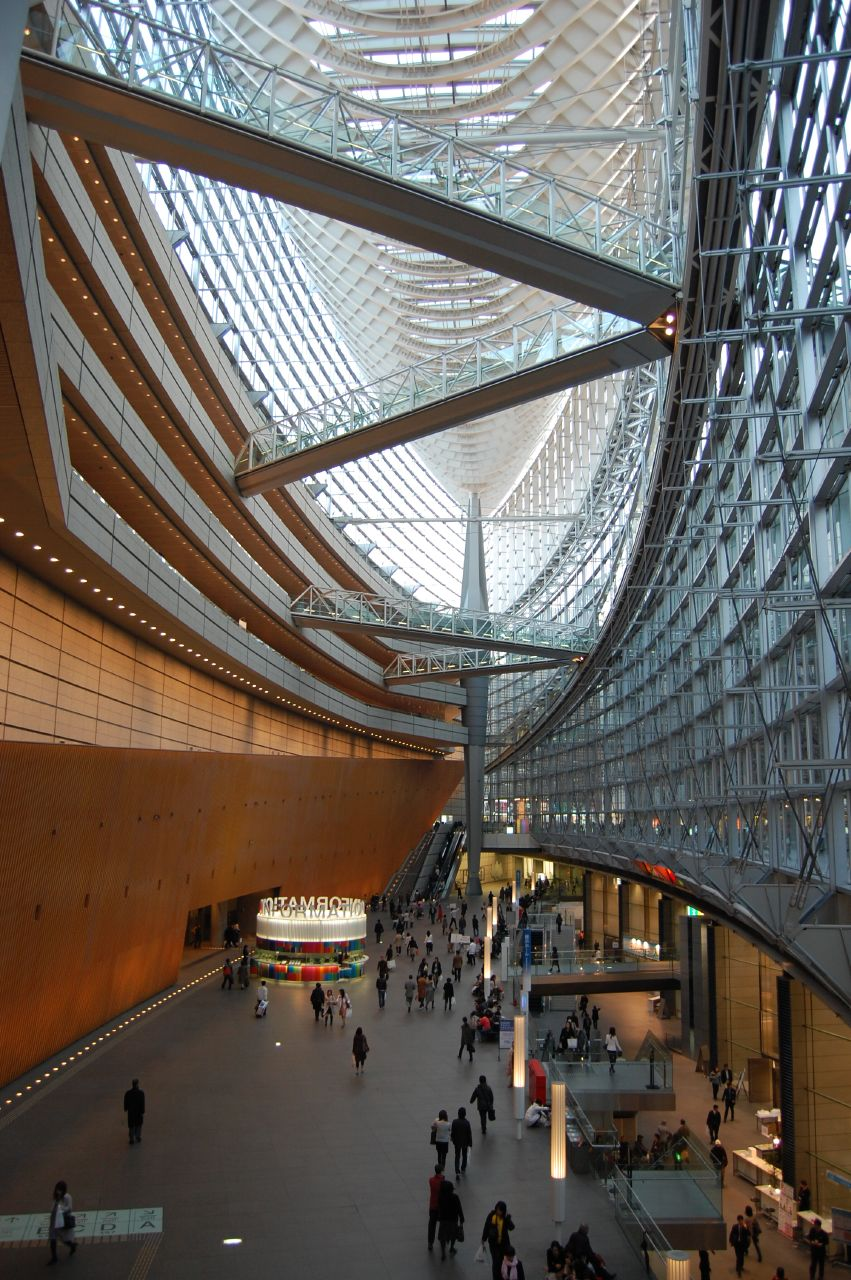

In [ ]:
# Input image
!wget https://www.dropbox.com/s/w7sk5faw51yn3lu/tokio_color.jpg
Icv = cv.imread('tokio_color.jpg')
cv2_imshow(Icv)

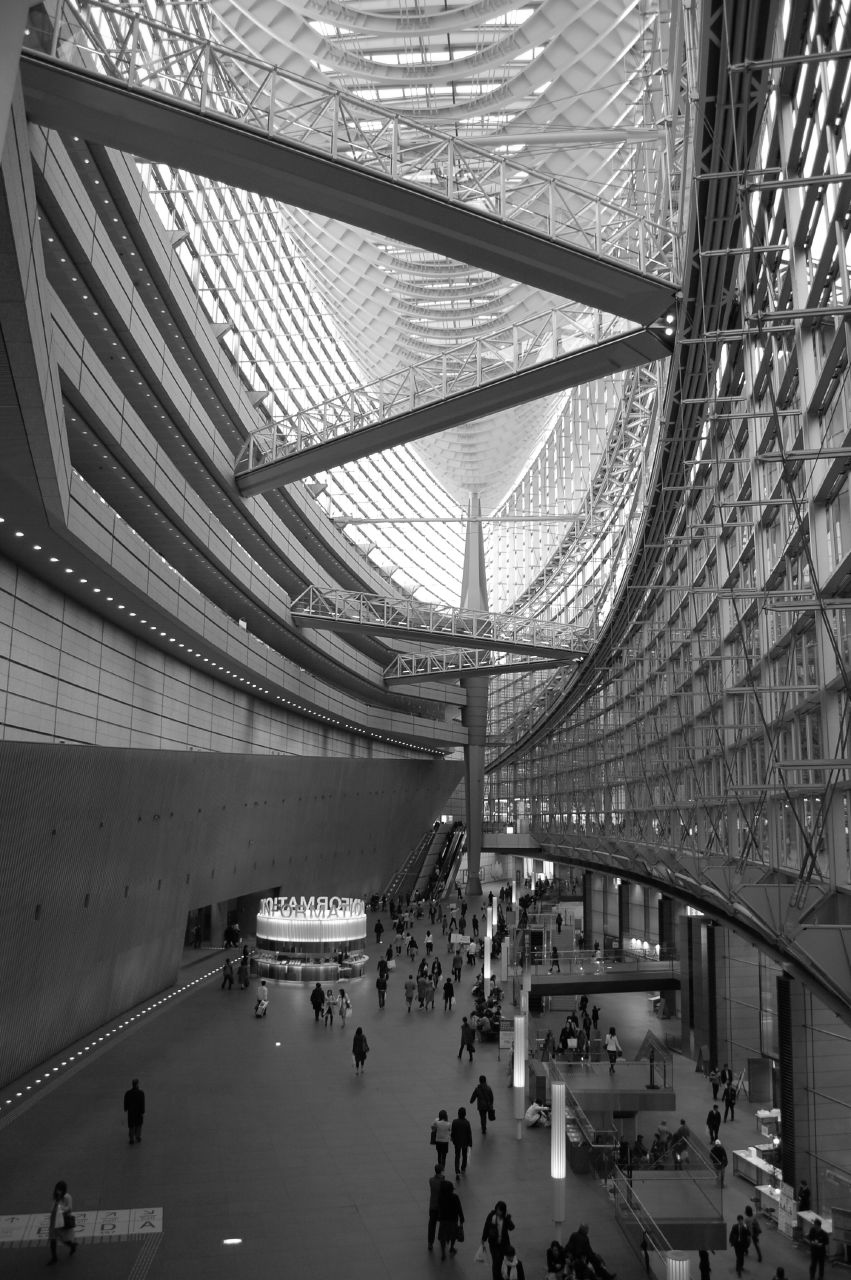

In [ ]:
# Conversion to grayscale
I = cv.cvtColor(Icv, cv.COLOR_BGR2GRAY)
cv2_imshow(I)

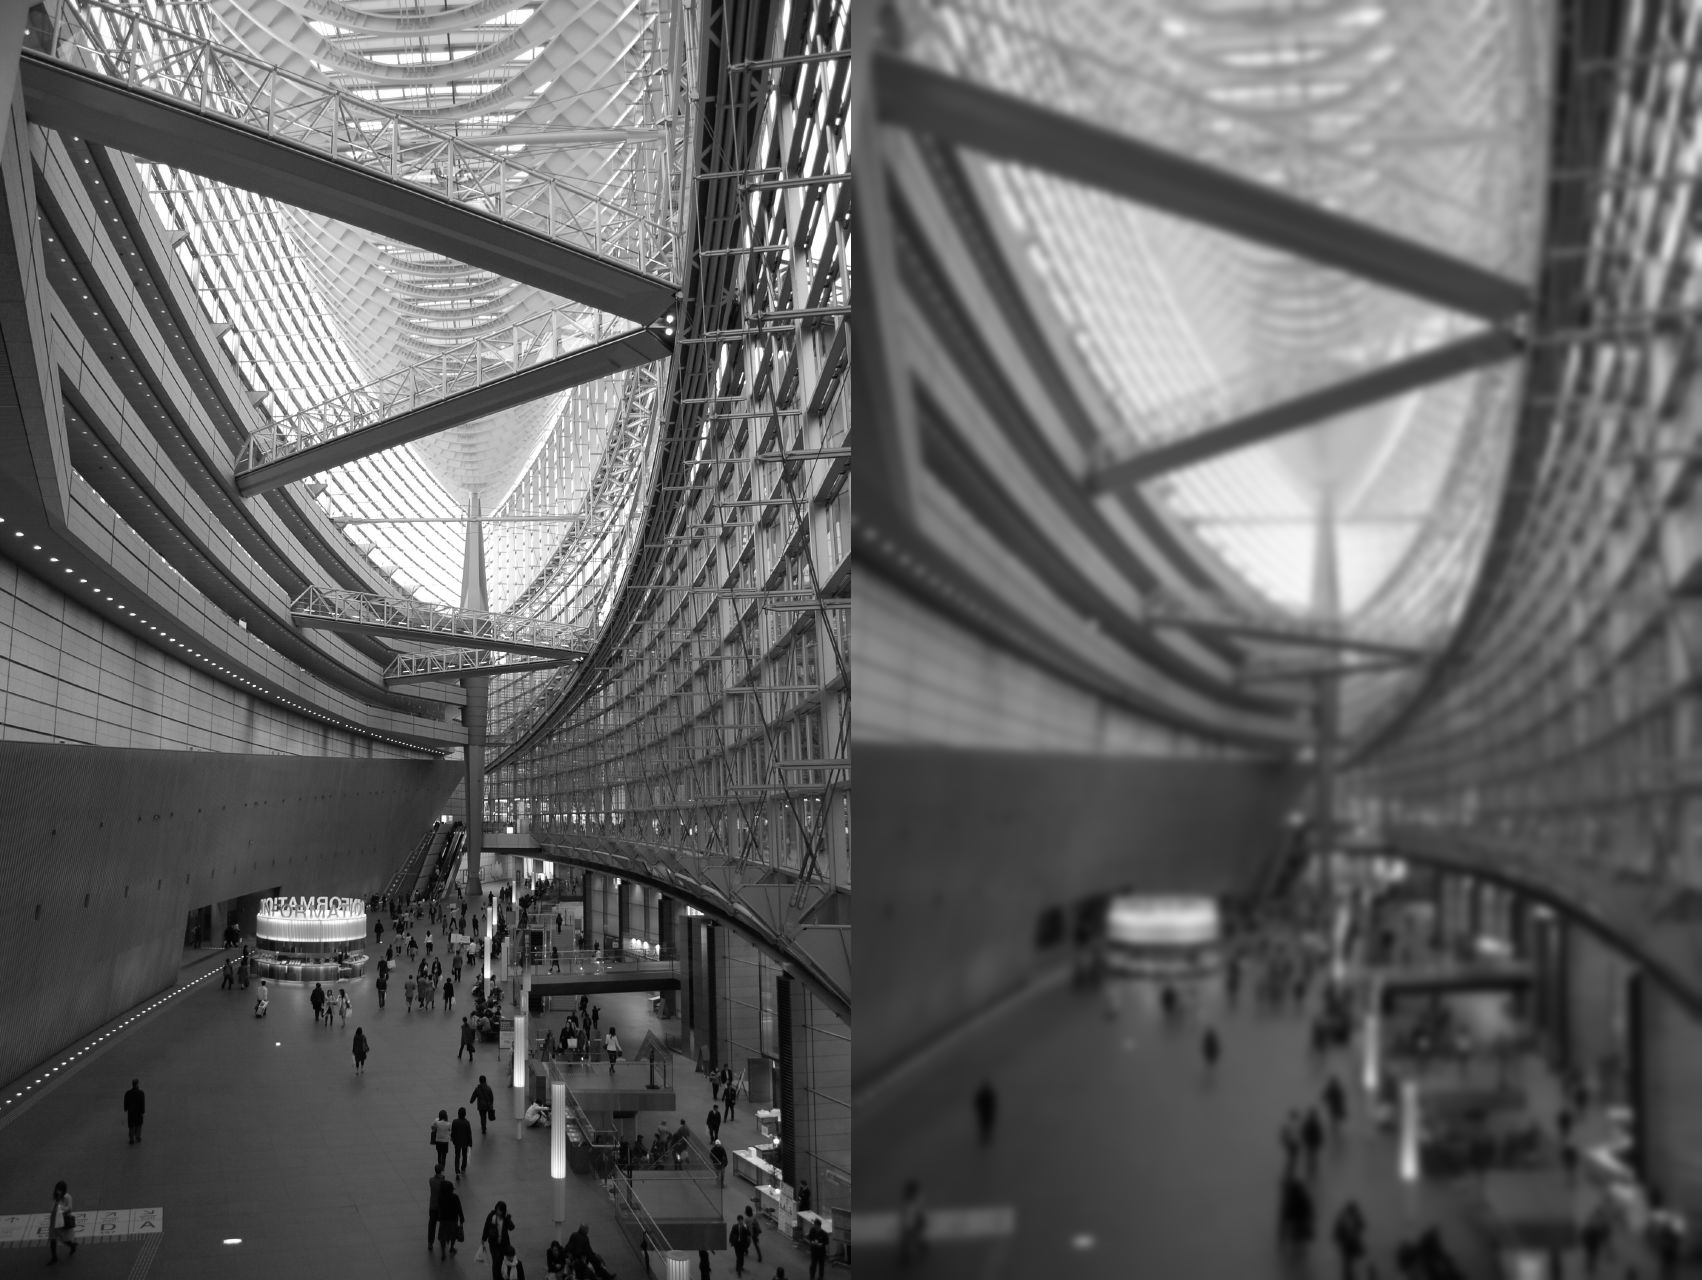

In [ ]:
# FGaussian Filtering
s      = 39
kernel = cv.getGaussianKernel(s, s/8.5)        # Gaussian s x 1  (s = size, s/8.5 = sigma)
window = np.outer(kernel, kernel.transpose())   # Gaussian s x s pixels
L      = cv.filter2D(I,-1,window)
Z      = np.concatenate((I,L),axis=1)
cv2_imshow(Z)

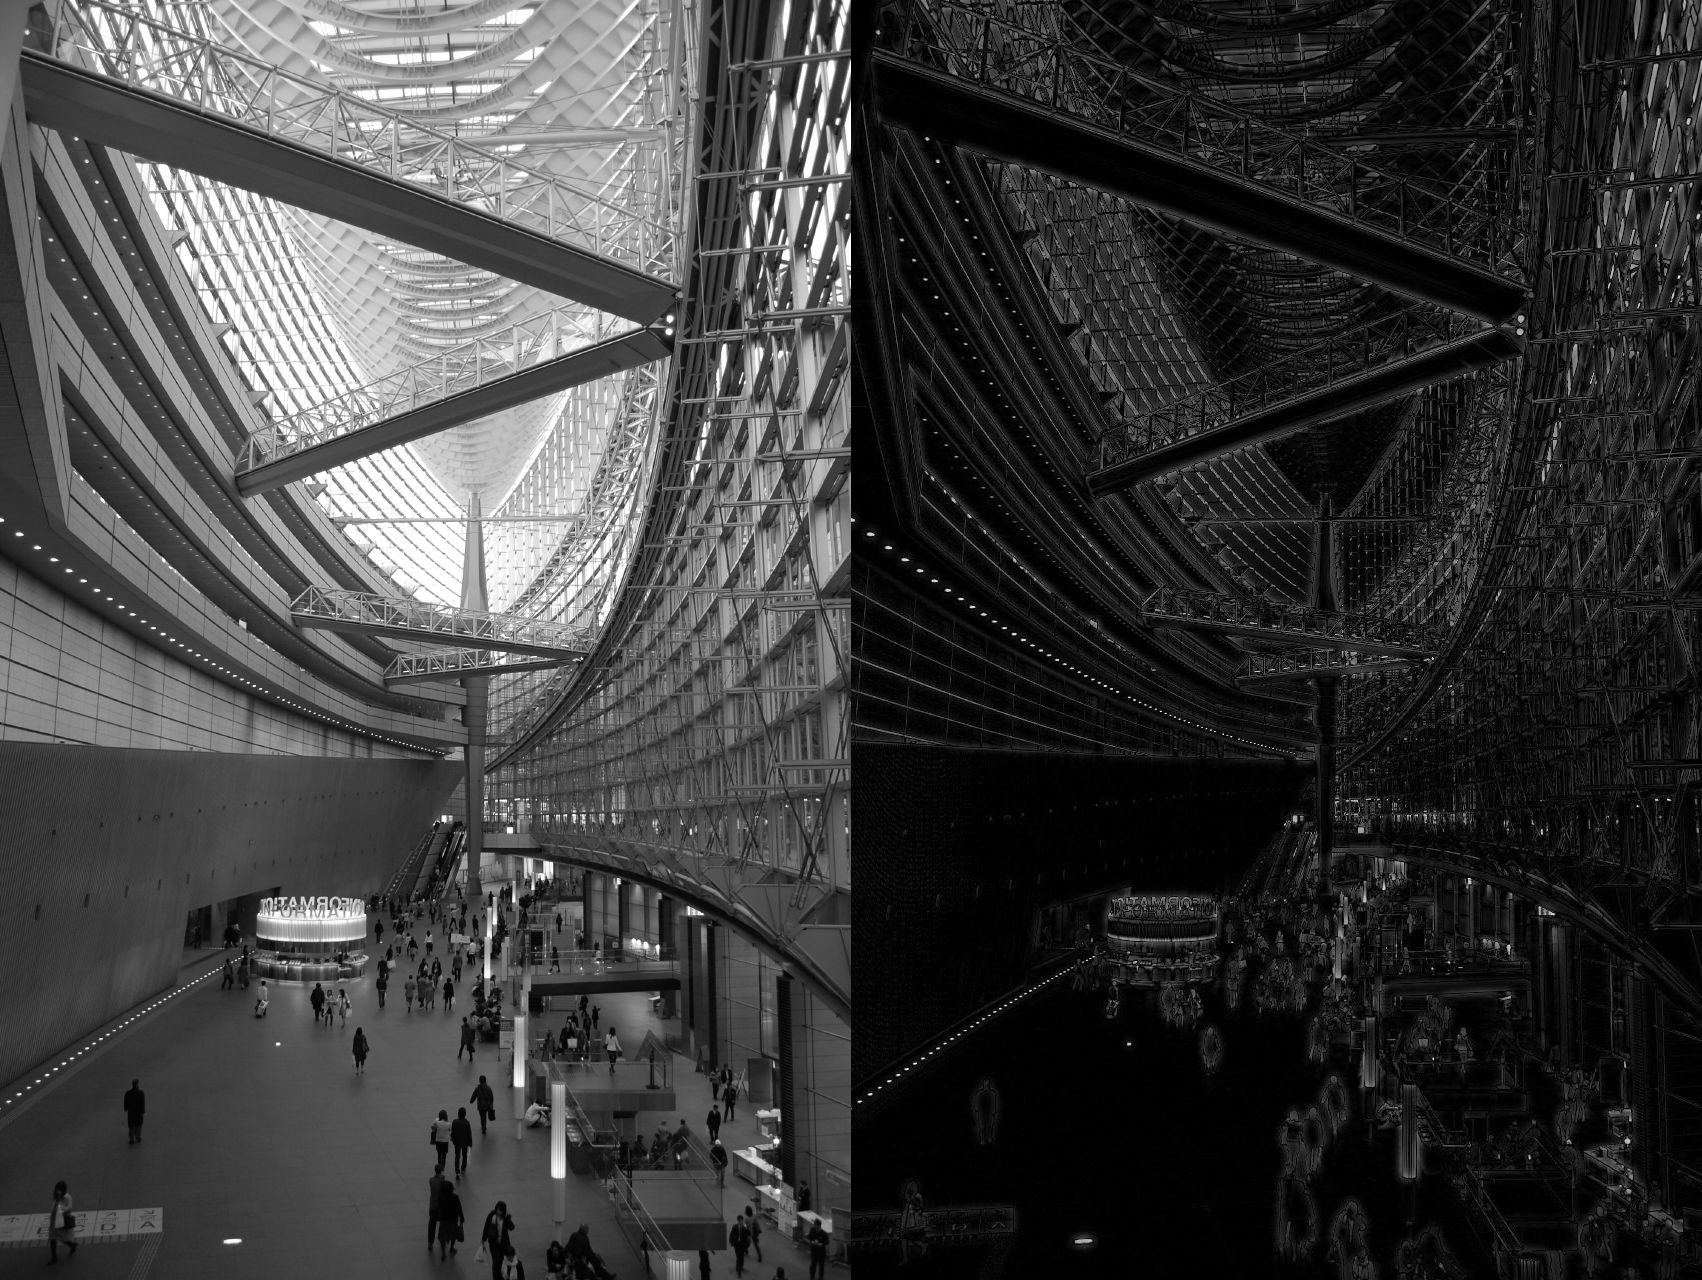

In [ ]:
# High Pass Filtering
Id = I.astype(float)
Ld = L.astype(float)
Hd = Id-Ld

# Visualization
H = np.abs(Hd)
H = H-np.min(H)
H = H/np.max(H)*255
Z = np.concatenate((I,H),axis=1)
cv2_imshow(Z)



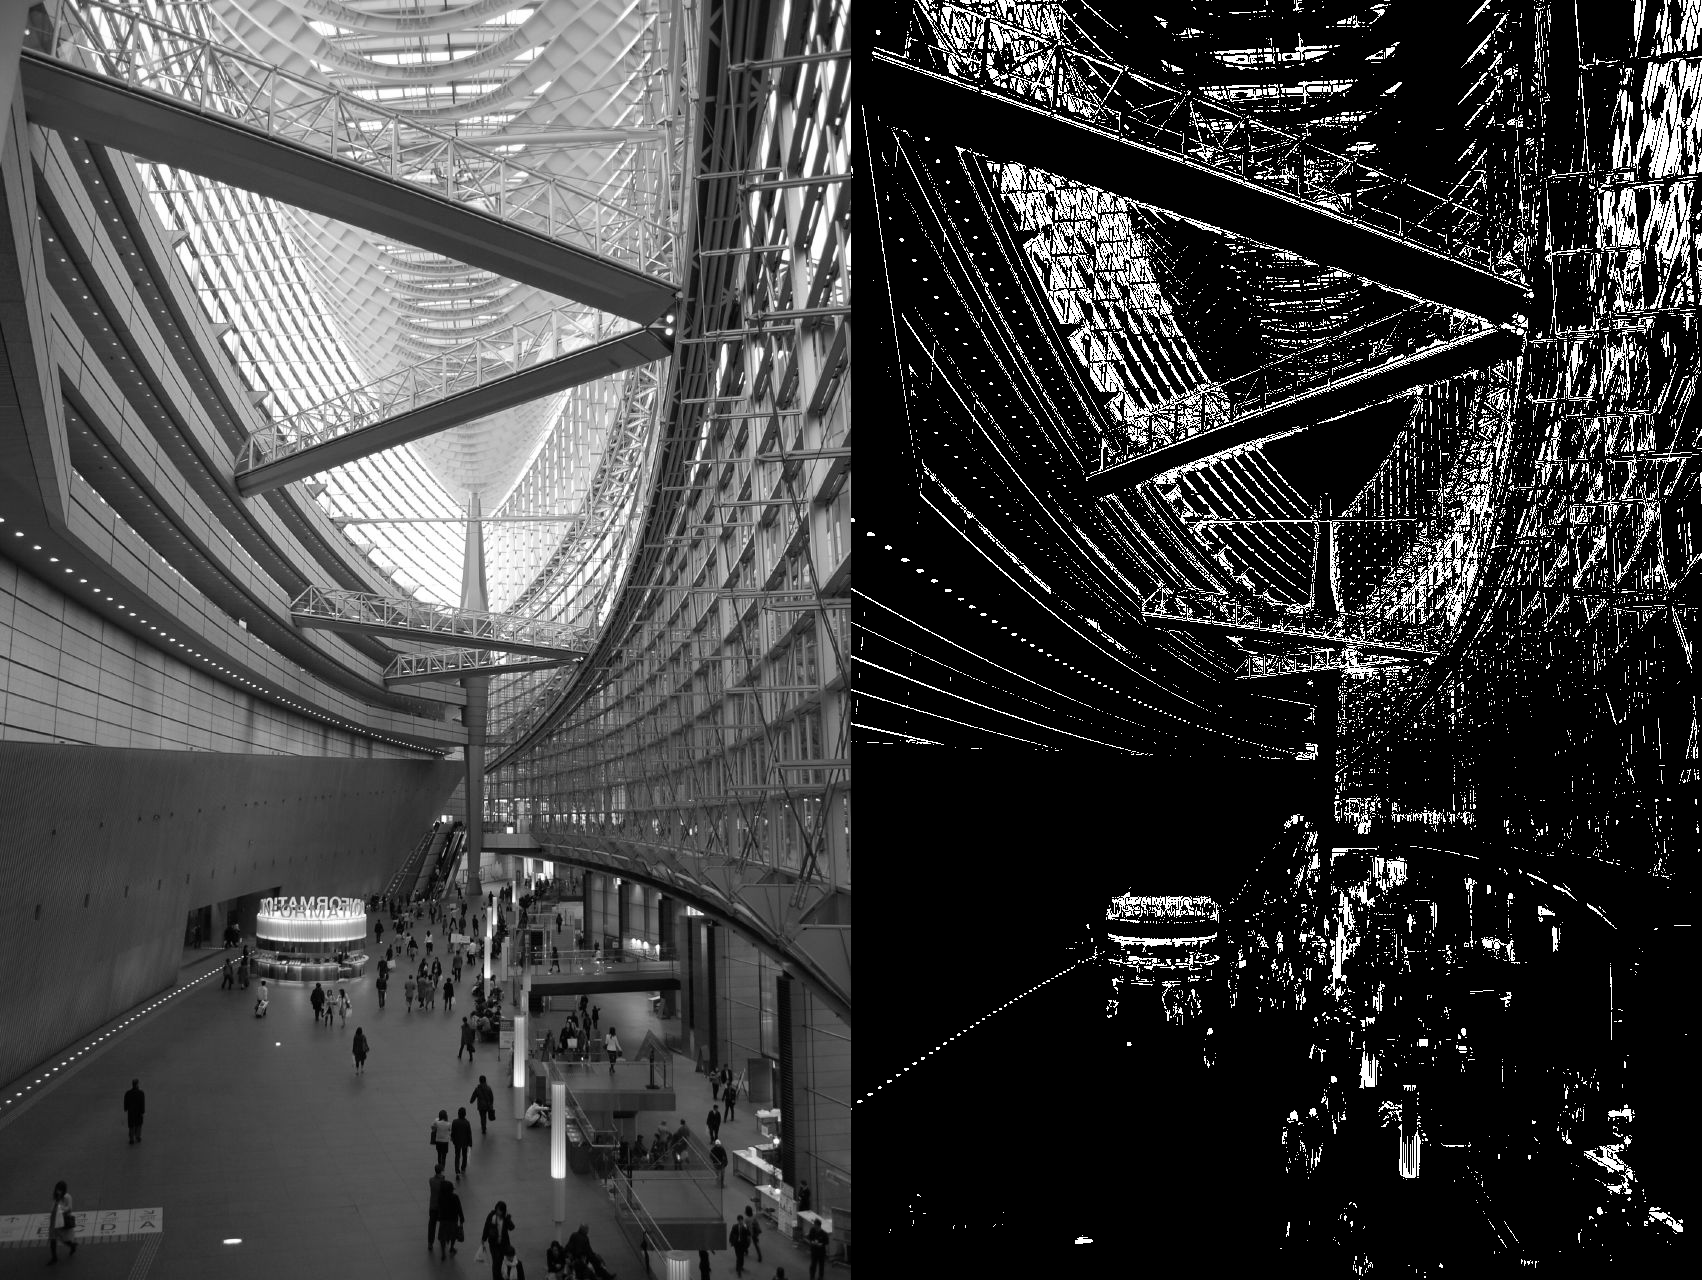

In [ ]:
# Edge detection
E = (H>50)*255
Z = np.concatenate((I,E),axis=1)
cv2_imshow(Z)



# 3) Sharpen Filtering

This is filter is used to enhance the smoothed details

In [ ]:
!wget https://www.dropbox.com/s/wu2fjmob9zfkrvl/moon.tif

--2023-09-05 14:55:14--  https://www.dropbox.com/s/wu2fjmob9zfkrvl/moon.tif
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/wu2fjmob9zfkrvl/moon.tif [following]
--2023-09-05 14:55:15--  https://www.dropbox.com/s/raw/wu2fjmob9zfkrvl/moon.tif
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8aae18263471610f7ed3de62ac.dl.dropboxusercontent.com/cd/0/inline/CDIK1LZ7SvLF-b9G6xHtX0rV41Gr--P76wceW3xqybGzX48A4vqnO2F_9BTRaR5oTydaf9zs_atmiLvLjU_suwFfZSMfZYumReu0r4BuGNg4z_TDw1V6Hauck8iPE71351Y/file# [following]
--2023-09-05 14:55:15--  https://uc8aae18263471610f7ed3de62ac.dl.dropboxusercontent.com/cd/0/inline/CDIK1LZ7SvLF-b9G6xHtX0rV41Gr--P76wceW3xqybGzX48A4vqnO2F_9BTRaR5oTydaf9zs_atmiLvLjU_suwFfZSMfZYumReu0r4BuGNg4z_TDw1V6Hauck8iPE71351Y/fil

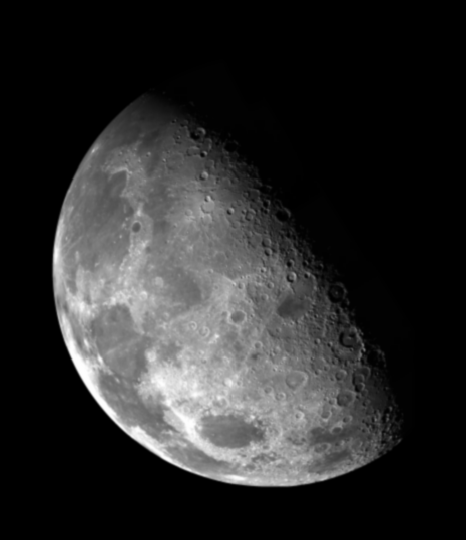

In [ ]:
# Original Image
I = cv.imread('moon.tif',0)
cv2_imshow(I)

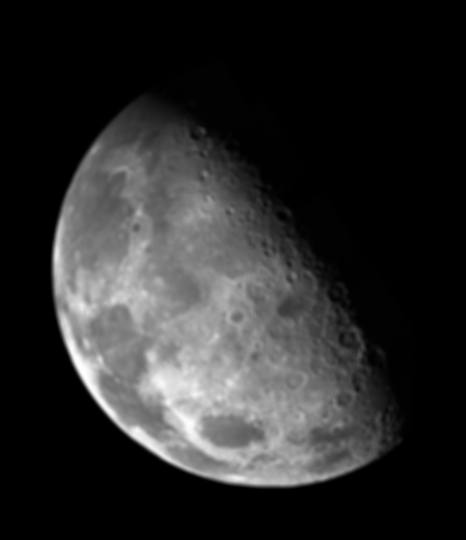

In [ ]:
# Filtered Image (low pass filter)
n   = 5
Mk  = np.ones((n,n),np.float32)/n/n
L   = cv.filter2D(I,-1,Mk)
cv2_imshow(L)

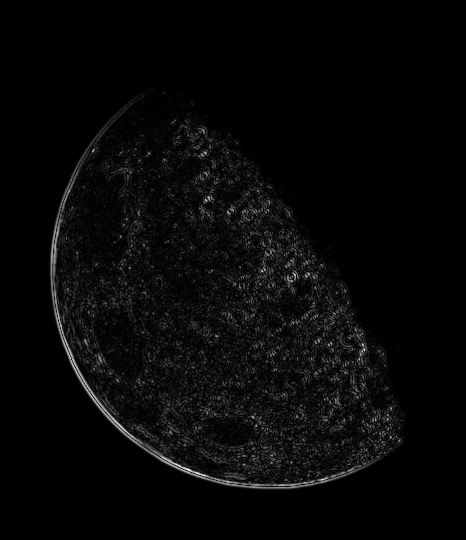

In [ ]:
# High pass filter
Id = I.astype(float)
Ld = L.astype(float)
Hd = Id-Ld

# Visualization
H = np.abs(Hd)
H = H-np.min(H)
H = H/np.max(H)*255
cv2_imshow(H)



Original (left) | Sharpen (right)


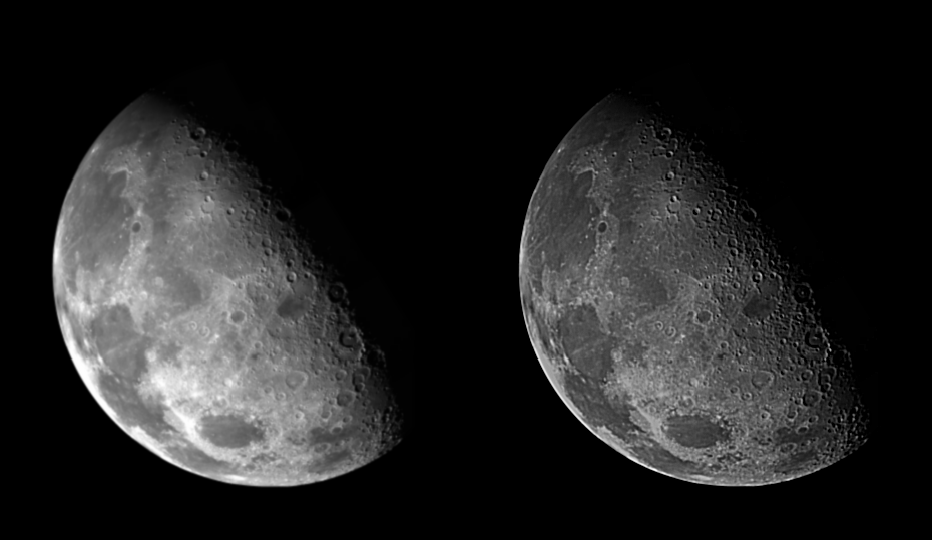

In [ ]:
# Sharpen: high pass pixels are amplified
Jd = Id + 3*Hd

Jd[Jd<0] = 0
Jd = Jd/np.max(Jd)*255

Z = np.concatenate((Id,Jd),axis=1)
print('Original (left) | Sharpen (right)')
cv2_imshow(Z)